In [ ]:
# Dependencies
import pandas as pd
from datetime import datetime,date
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# O'hare weather dataframe - Documentation available at https://openweathermap.org/history#historybulk
# Temepratures are measured in Farenheit

# Data file path to weather
file = "history_bulk.csv"

# Read our weather data into pandas
df = pd.read_csv(file)


df.columns  # Check name of columns
# df.dtypes # Check column data type

In [ ]:
# Create weather dataframe
weather_df=pd.DataFrame([])


# Create O'hare weather dataframe 
weather_df['Date']=df['dt_iso']
#-----------Format object to datetime--------------------------
weather_df['Date']=weather_df['Date'].str.slice(0, -18) # Remove trailing characters from datetime object
weather_df['Date'] = pd.to_datetime(weather_df['Date'], errors='coerce') # convert object to datetime
# Format to mm-dd-yy
weather_df['Date'] =  weather_df["Date"].dt.strftime("%m/%d/%y") 
#--------------------------------------------------------------- 
weather_df['Temp']=df['temp']
weather_df['Temp Min']=df['temp_min']
weather_df['Temp Max']=df['temp_max']
weather_df['Pressure']=df['pressure']
weather_df['Humidity']=df['humidity']
weather_df['Wind Speed']=df['wind_speed']
weather_df['Clouds']=df['clouds_all']
weather_df['Weather Condition']=df['weather_main'] # Main weather condition
weather_df['Weather Descr']=df['weather_description'] # Main weather condition description

weather_df

In [4]:
# Create weather_data df
weather_data=pd.DataFrame(weather_df, columns =['Date','Temp','Temp Min','Temp Max','Pressure','Humidity','Wind Speed',
                                       'Clouds'])
# Sort Date
weather_data.sort_values(by='Date', ascending=False)


# Daily averages, min and max
temp_avg = weather_data.groupby('Date')['Temp'].mean()
temp_min = weather_data.groupby('Date')['Temp Min'].min()
temp_max = weather_data.groupby('Date')['Temp Max'].max()
pressure_avg = weather_data.groupby('Date')['Pressure'].mean()
humidity_avg = weather_data.groupby('Date')['Humidity'].mean()
wind_avg = weather_data.groupby('Date')['Wind Speed'].mean()
clouds_avg = weather_data.groupby('Date')['Clouds'].mean()


# #Summar Weather Table
summary_weather_df = pd.DataFrame({  
                                     "Avg Temp": round(temp_avg,2), # Daily temperature average - FarenheitS  
                                     "Temp Min": temp_min,  # Daily minimum temperature - Farenheit 
                                     "Temp Max": temp_max,  # Daily maximum temperature - Farenheit 
                                     "Pressure":round(pressure_avg,2), # Atmospheric pressure (on the sea level, if there is no sea_level or grnd_level data), hPa
                                     "Humidity %": round(humidity_avg),  # Humidity %
                                     "Wind Speed":round(wind_avg,2),   # Wind speed meter/sec.
                                     "Clouds %": round(clouds_avg,2),    # Cloudiness %
                                
                                 })

summary_weather_df
           
    


,Avg Temp,Temp Min,Temp Max,Pressure,Humidity %,Wind Speed,Clouds %
Date,,,,,,,
01/01/17,28.11,17.60,39.92,1017.33,72.0,6.04,13.54
01/01/18,-1.19,-9.41,10.40,1038.62,59.0,11.98,12.25
01/01/19,31.90,25.00,39.20,1015.61,92.0,10.31,90.00
01/02/17,34.45,23.00,40.46,1018.96,81.0,6.36,60.89
01/02/18,-1.96,-11.96,10.94,1036.00,63.0,9.17,14.67
...,...,...,...,...,...,...,...
12/30/18,26.52,17.60,37.99,1017.30,77.0,11.47,55.74
12/30/19,38.03,28.00,55.00,996.23,85.0,13.54,90.00
12/31/17,4.39,-3.93,14.19,1032.79,60.0,10.31,62.29


In [5]:
# Create dataframe to hold unique dates
d=weather_df.groupby(['Date']).groups.keys()
date_column_df = pd.DataFrame(d)
date_column_df.columns  =["Date"]

# Merged daily summary with unique date to create a date dataframe
merged_weather_df = pd.merge(date_column_df, summary_weather_df, on="Date", how="left")

merged_weather_df


,Date,Avg Temp,Temp Min,Temp Max,Pressure,Humidity %,Wind Speed,Clouds %
0,01/01/17,28.11,17.60,39.92,1017.33,72.0,6.04,13.54
1,01/01/18,-1.19,-9.41,10.40,1038.62,59.0,11.98,12.25
2,01/01/19,31.90,25.00,39.20,1015.61,92.0,10.31,90.00
3,01/02/17,34.45,23.00,40.46,1018.96,81.0,6.36,60.89
4,01/02/18,-1.96,-11.96,10.94,1036.00,63.0,9.17,14.67
...,...,...,...,...,...,...,...,...
1090,12/30/18,26.52,17.60,37.99,1017.30,77.0,11.47,55.74
1091,12/30/19,38.03,28.00,55.00,996.23,85.0,13.54,90.00
1092,12/31/17,4.39,-3.93,14.19,1032.79,60.0,10.31,62.29
1093,12/31/18,35.62,30.00,39.99,1006.53,92.0,8.73,84.41


In [6]:
#========================== Create dataframe to flag daily weather conditions (Starts here)==============================

# Create temporary df to hold different weather conditions
temp = pd.DataFrame(weather_df)  
# Find each condition
temp["Clouds"]=(weather_df["Weather Condition"]=="Clouds")
temp["Drizzle"]=(weather_df["Weather Condition"]=="Drizzle")
temp["Fog"]=(weather_df["Weather Condition"]=="Fog")
temp["Mist"]=(weather_df["Weather Condition"]=="Mist")
temp["Rain"]=(weather_df["Weather Condition"]=="Rain")
temp["Snow"]=(weather_df["Weather Condition"]=="Snow")
temp["Thunderstorm"]=(weather_df["Weather Condition"]=="Thunderstorm")

# Convert True to 1 and False to 0
temp.Clouds = temp.Clouds.astype(int)
temp.Drizzle = temp.Drizzle.astype(int)
temp.Fog = temp.Fog.astype(int)
temp.Mist = temp.Mist.astype(int)
temp.Rain = temp.Rain.astype(int)
temp.Snow = temp.Snow.astype(int)
temp.Thunderstorm = temp.Thunderstorm.astype(int)

# Group condition by date, sum
t_cloud = temp.groupby('Date')['Clouds'].sum()
t_drizzle = temp.groupby('Date')['Drizzle'].sum()
t_fog = temp.groupby('Date')['Fog'].sum()
t_mist = temp.groupby('Date')['Mist'].sum()
t_rain = temp.groupby('Date')['Rain'].sum()
t_snow = temp.groupby('Date')['Snow'].sum()
t_thunderstorm = temp.groupby('Date')['Thunderstorm'].sum()


# Create dataframe to hold group and condition sum
t_df = pd.DataFrame({  'Clouds': t_cloud,
                       'Drizzle': t_drizzle,
                        'Fog': t_fog,
                        'Mist': t_mist, 
                        'Rain': t_rain,
                        'Snow': t_snow,
                         'Thunderstorm': t_thunderstorm
                    })


# t_df.head()

In [7]:
#Create another df for condition comparison 
t2df=pd.DataFrame(columns=["Clouds","Drizzle","Fog","Mist","Rain","Snow","Thunderstorm"])

# if the sum of each condition is greater than zero, condition flagged in t2df
t2df["Clouds"]=(t_df["Clouds"]>0)
t2df.Clouds = t2df.Clouds.astype(int)

t2df["Drizzle"]=(t_df["Drizzle"]>0)
t2df.Drizzle = t2df.Drizzle.astype(int)

t2df["Fog"]=(t_df["Fog"]>0)
t2df.Fog = t2df.Fog.astype(int)
                                   
t2df["Mist"]=(t_df["Mist"]>0)
t2df.Mist = t2df.Mist.astype(int)
 
t2df["Rain"]=(t_df["Rain"]>0)
t2df.Rain = t2df.Rain.astype(int)

t2df["Snow"]=(t_df["Snow"]>0)
t2df.Snow = t2df.Snow.astype(int)
 
t2df["Thunderstorm"]=(t_df["Thunderstorm"]>0)
t2df.Thunderstorm = t2df.Thunderstorm.astype(int)

t2df=t2df[["Drizzle","Fog","Mist","Rain","Snow","Thunderstorm","Clouds"]]


#========================== Create dataframe to flag daily weather conditions (Ends here)==============================



In [8]:
# Merged t2df(weather conditions) with merged_weather_df(avg temp, temp min, temp max..)
final_weather_df = pd.merge(merged_weather_df,t2df, on="Date", how="left")
final_weather_df['Date'] = final_weather_df['Date'].astype('datetime64[ns]') #Formate date object to datetime

final_weather_df.head()



,Date,Avg Temp,Temp Min,Temp Max,Pressure,Humidity %,Wind Speed,Clouds %,Drizzle,Fog,Mist,Rain,Snow,Thunderstorm,Clouds
0,2017-01-01,28.11,17.60,39.92,1017.33,72.0,6.04,13.54,0,0,0,0,0,0,1
1,2018-01-01,-1.19,-9.41,10.40,1038.62,59.0,11.98,12.25,0,0,0,0,0,0,1
2,2019-01-01,31.90,25.00,39.20,1015.61,92.0,10.31,90.00,0,0,1,1,1,0,1
3,2017-01-02,34.45,23.00,40.46,1018.96,81.0,6.36,60.89,1,0,1,1,0,0,1
4,2018-01-02,-1.96,-11.96,10.94,1036.00,63.0,9.17,14.67,0,0,0,0,0,0,1


In [9]:
# Data file path to flights 
flights_file = "Flights.csv"

# Read our flights dat into pandas
flights_data = pd.read_csv(flights_file)

flights_data.columns
#flights_df.head()

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Actual elapsed time (Minutes)',
       'Departure delay (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Unnamed: 14'],
      dtype='object')

In [10]:
#-----------Flights Data Frame----------------------------------------------------
flights_df=pd.DataFrame([])

flights_df['Carrier Code']= flights_data['Carrier Code']
#-----------------------------Format flights date object to datetime (start)----------------------------
flights_df['Date'] = flights_data['Date'].astype('datetime64[ns]')
#-----------------------------Format flight date object to datetime (end)----------------
flights_df['Flight Number']= flights_data['Flight Number']
flights_df['Tail Number']= flights_data['Tail Number']
flights_df['Dest Airport']= flights_data['Destination Airport']
flights_df['Scheduled departure time']= flights_data['Scheduled departure time']
flights_df['Actual departure time']= flights_data['Actual departure time']
flights_df['Actual elapsed time (Minutes)']= flights_data['Actual elapsed time (Minutes)']
flights_df['Departure delay (Minutes)']= flights_data['Departure delay (Minutes)']
flights_df['Delay Carrier (Minutes)']= flights_data['Delay Carrier (Minutes)']
flights_df['Delay Weather (Minutes)']= flights_data['Delay Weather (Minutes)']
flights_df['Delay National Aviation System (Minutes)']= flights_data['Delay National Aviation System (Minutes)']
flights_df['Delay Security (Minutes)']= flights_data['Delay Security (Minutes)']
flights_df['Delay Late Aircraft Arrival (Minutes)']= flights_data['Delay Late Aircraft Arrival (Minutes)']

# flights_df
# flights_df.dtypes
final_weather_df.dtypes

Date            datetime64[ns]
Avg Temp               float64
Temp Min               float64
Temp Max               float64
Pressure               float64
Humidity %             float64
Wind Speed             float64
Clouds %               float64
Drizzle                  int32
Fog                      int32
Mist                     int32
Rain                     int32
Snow                     int32
Thunderstorm             int32
Clouds                   int32
dtype: object

In [11]:
# Merge weather and flights data frame
master_df = pd.merge(flights_df, final_weather_df, on="Date")
master_df
master_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number', 'Dest Airport',
       'Scheduled departure time', 'Actual departure time',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)', 'Avg Temp', 'Temp Min',
       'Temp Max', 'Pressure', 'Humidity %', 'Wind Speed', 'Clouds %',
       'Drizzle', 'Fog', 'Mist', 'Rain', 'Snow', 'Thunderstorm', 'Clouds'],
      dtype='object')

In [12]:
master_df["Date"] = pd.to_datetime(master_df["Date"], infer_datetime_format=True)
master_df["Date"].dt.year

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
452850    2019
452851    2019
452852    2019
452853    2019
452854    2019
Name: Date, Length: 452855, dtype: int64

In [18]:
master_df["Year"] = pd.DatetimeIndex(master_df["Date"]).year
master_df

,Carrier Code,Date,Flight Number,Tail Number,Dest Airport,Scheduled departure time,Actual departure time,Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),...,Clouds %,Drizzle,Fog,Mist,Rain,Snow,Thunderstorm,Clouds,year,Year
0,AA,2017-01-01,2201,N439AA,STL,21:50,21:45,66,0,0,...,13.54,0,0,0,0,0,0,1,2017,2017
1,AA,2017-01-01,2474,N4YNAA,MSP,21:50,23:21,73,91,7,...,13.54,0,0,0,0,0,0,1,2017,2017
2,AA,2017-01-01,2619,N867AA,LAX,21:50,21:45,269,0,0,...,13.54,0,0,0,0,0,0,1,2017,2017
3,AA,2017-01-01,437,N982AA,PHL,20:40,20:36,107,0,0,...,13.54,0,0,0,0,0,0,1,2017,2017
4,AA,2017-01-01,348,N3NLAA,LGA,20:35,20:33,109,0,0,...,13.54,0,0,0,0,0,0,1,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452850,UA,2019-12-31,1142,N818UA,BDL,6:00,6:00,135,0,0,...,90.33,0,0,1,0,1,0,1,2019,2019
452851,UA,2019-12-31,1155,N845UA,ATL,6:00,6:08,121,8,0,...,90.33,0,0,1,0,1,0,1,2019,2019
452852,UA,2019-12-31,1477,N27477,FLL,6:00,6:11,183,11,0,...,90.33,0,0,1,0,1,0,1,2019,2019
452853,UA,2019-12-31,2043,N69838,IAH,6:00,5:59,158,0,0,...,90.33,0,0,1,0,1,0,1,2019,2019


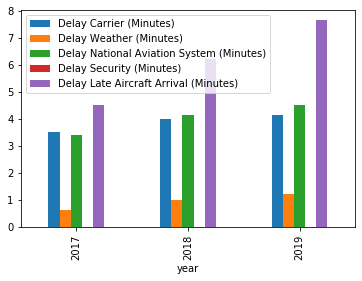

In [17]:
master_df.groupby("year")[#'Departure delay (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)'].mean().plot(kind='bar')



In [ ]:
labels = ['2017', '2018', '2019']
x_axis = [2017,2018,2019]
y_axis = ['Departure delay (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)']

#x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, x_axis, width, label='Years')
rects2 = ax.bar(x + width/2, y_axis, width, label='Delays')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Departure delay (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)')
ax.set_title('Years')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
master_df["Date"] = pd.to_datetime(master_df["Date"], infer_datetime_format=True)

plt.clf()
master_df["Date"].map(lambda d: d.year).plot(kind='bar')
#master_df["Date"].map(lambda d: d."2019").plot(kind='hist')
plt.show()

In [ ]:
#plt.scatter(master_df["Date"].astype('datetime64[Y]), master_df["Temp Max"], marker="o", c= "blue", alpha=0.75, edgecolors="black")
plt.scatter(master_df["Date"], master_df["Departure delay (Minutes)"], marker="o", c= "blue", alpha=0.75, edgecolors="black")
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title(f'Max Temperature', fontsize=12, fontweight="bold")
#a = np.timedelta64(1, 'Y')
plt.show()
#plt.savefig("Results/max_temp.png")

In [ ]:
df.plot(kind='bar',x= ["Date"].loc,y="Delay Carrier (Minutes)",color='red')
plt.show()

In [ ]:
master_df.plot.bar() 
